In [ ]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"




In [ ]:
#city_data = pd.read_csv("data/city_data.csv")
#city_data.head()


# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)


#grpRide = ride.groupby(["city"])
#avgFare=round(grpRide["fare"].mean(),2)
#sumRides=grpRide["ride_id"].count()
#sumRides.head()

# Combine the data into a single dataset
ridecity_df = pd.merge(city_data,ride_data,on="city")
ridecity_df.head()

# Display the data table for preview

#rideSum = pd.DataFrame({"Avg Fare":avgFare,"Total Rides":sumRides})
#rideSum = rideSum.reset_index()
#data=pd.merge(city,rideSum,on="city")
#data.sort_values("Total Rides", ascending=False).head()


#city_data = pd.read_csv("data/city_data.csv")
#city_data.head()

# Combine the data into a single dataset

# Display the data table for preview


## Bubble Plot of Ride Sharing Data

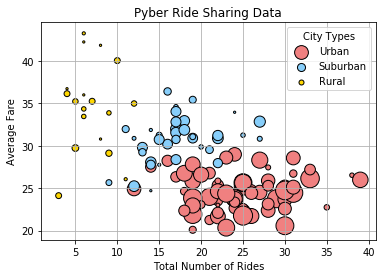

In [8]:
# Obtain the x and y coordinates for each of the three city types
urban_df = ridecity_df[ridecity_df["type"]=="Urban"]
suburban_df = ridecity_df[ridecity_df["type"]=="Suburban"]
rural_df = ridecity_df[ridecity_df["type"]=="Rural"]

#circle size correlates to driver count per city (each circle is one city)
urban_rides = urban_df.groupby(["city"]).count()["ride_id"] #giving us the count of rides based on the ride id
suburban_rides = suburban_df.groupby(["city"]).count()["ride_id"]
rural_rides = rural_df.groupby(["city"]).count()["ride_id"]

rural_fare = rural_df.groupby(["city"]).mean()["fare"]
suburban_fare = suburban_df.groupby(["city"]).mean()["fare"]
urban_fare = urban_df.groupby(["city"]).mean()["fare"]

rural_drivercount = rural_df.groupby(["city"]).mean()["driver_count"] #we still use mean function because we want to use the driver count number(38) not add them
suburban_drivercount = suburban_df.groupby(["city"]).mean()["driver_count"]
urban_drivercount = urban_df.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(urban_rides,urban_fare, s=5*urban_drivercount, c="lightcoral",marker= "o", label= "Urban", edgecolors="black" )
plt.scatter(suburban_rides,suburban_fare, s=5*suburban_drivercount, c="lightskyblue",marker= "o", label= "Suburban", edgecolors="black")
plt.scatter(rural_rides,rural_fare, s=5*rural_drivercount, c="gold",marker= "o", label= "Rural",edgecolors="black" )


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare")
plt.grid(True)

# Create a legend
plt.legend(loc="best", title= "City Types")

# Incorporate a text label regarding circle size

# Save Figure




In [9]:
# Show plot
plt.show()

## Total Fares by City Type

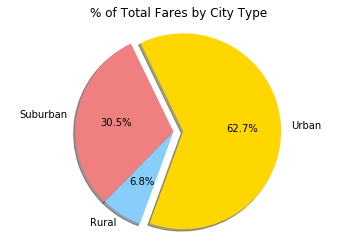

([<matplotlib.patches.Wedge at 0x9a103d0>,
 [Text(1.07491,0.233596,''),
  Text(0.20317,1.08107,''),
  Text(-0.428113,-1.01327,'')])

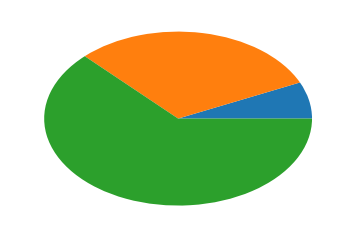

In [5]:
#Percentage of Total Fares by City Type Pie Chart

number_of_urban = ridecity_df[ridecity_df.loc[:,'type'] == "Urban"].fare.sum()
number_of_suburban = ridecity_df[ridecity_df.loc[:,'type'] == "Suburban"].fare.sum()
number_of_rural = ridecity_df[ridecity_df.loc[:,'type'] == "Rural"].fare.sum()
number_of_fares = ridecity_df.fare.sum()


# Calculate Type Percents
faretype_percent = 100*ridecity_df.groupby(["type"]).sum()["fare"]/ridecity_df["fare"].sum()

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [number_of_urban,number_of_suburban, number_of_rural]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, explode = explode, colors = colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=-110)
plt.axis('equal')
plt.title("% of Total Fares by City Type")
plt.show()

# Build Pie Chart
plt.pie(faretype_percent)

# Save Figure




In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


Text(0.5,1,'Percent of Total Rides by City Type')

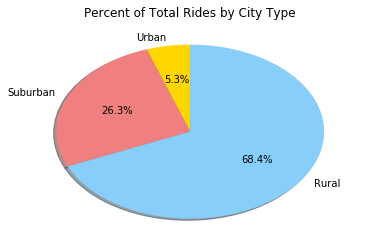

In [14]:
# Calculate Ride Percents

# Build Pie Chart

#Percentage of Total Rides by City Type Pie Chart

#number_of_urban = ridecity_df[ridecity_df.loc[:,'type'] == "Urban"].city.count()
#number_of_suburban = ridecity_df[ridecity_df.loc[:,'type'] == "Suburban"].city.count()
#number_of_rural = ridecity_df[ridecity_df.loc[:,'type'] == "Rural"].city.count()
#number_of_fares = ridecity_df.city.count()

# Labels for the sections of our pie chart
#labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
#sizes = [number_of_urban,number_of_suburban, number_of_rural]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
#explode = (0.1, 0, 0)

#plt.pie(sizes, explode = explode, colors = colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=-110)
#plt.axis('equal')
#plt.title("% of Total Rides by City Type")
#plt.show()


 
CombinedTotalRidesPerType = ridecity_df.groupby("type").count()["ride_id"]
print(CombinedTotalRidesPerType)
 
# Create a Pie Chart
plt.pie(CombinedTotalRidesPerType , colors = colors, labels = labels , autopct = "%1.1f%%" , shadow = True , startangle = 90)
 
# Set Title
plt.title("Percent of Total Rides by City Type")

# Save Figure


In [10]:
# Show Figure
plt.show()

## Total Drivers by City Type

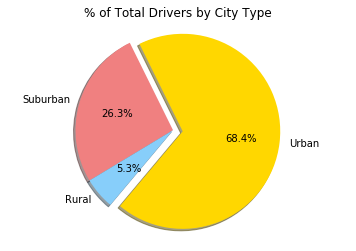

In [11]:
# Calculate Driver Percents

# Build Pie Charts

number_of_urban = ridecity_df[ridecity_df.loc[:,'type'] == "Urban"].driver_count.count()
number_of_suburban = ridecity_df[ridecity_df.loc[:,'type'] == "Suburban"].driver_count.count()
number_of_rural = ridecity_df[ridecity_df.loc[:,'type'] == "Rural"].driver_count.count()
number_of_fares = ridecity_df.city.count()

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [number_of_urban,number_of_suburban, number_of_rural]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, explode = explode, colors = colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=-130)
plt.axis('equal')
plt.title("% of Total Drivers by City Type")
plt.show()

# Save Figure

In [ ]:
# Show Figure
plt.show()